In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Country-data.csv to Country-data.csv


In [7]:
df = pd.read_csv("Country-data.csv")

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
df.shape

(167, 10)

In [12]:
df.drop("country",axis=1,inplace=True)

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

As now we have scaled our data every column to a similar scale, we can start clustering.

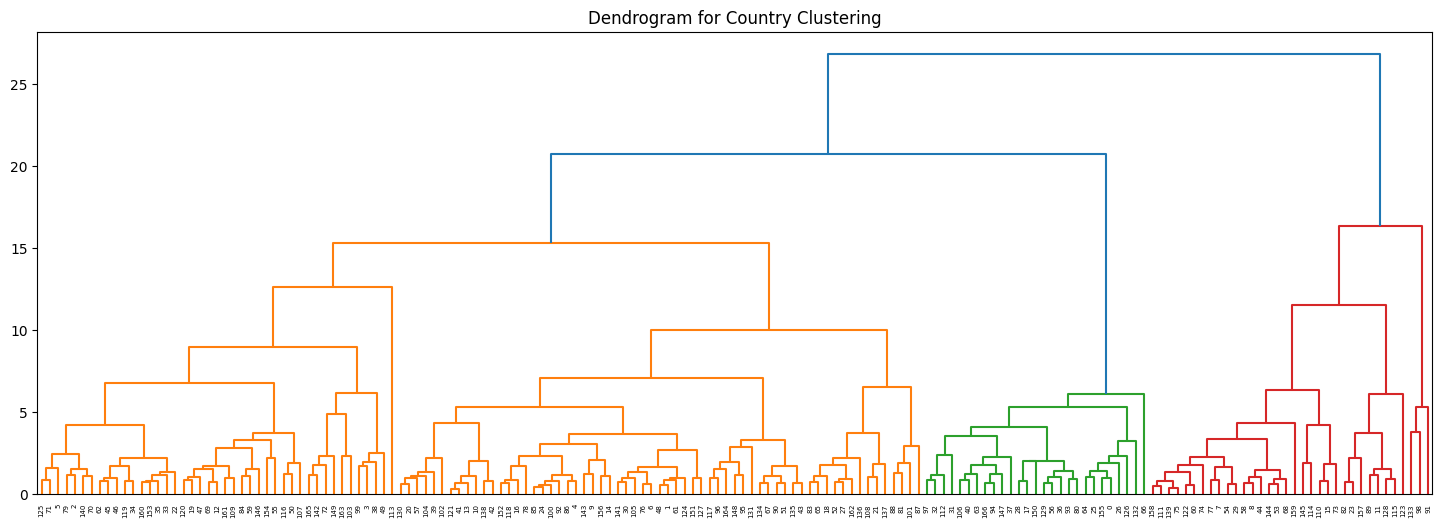

In [17]:
linked = linkage(scaled_data, method ='ward')  # 'ward' minimizes within-cluster variance
plt.figure(figsize=(18, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram for Country Clustering")
plt.show()

In [19]:
# Step 6: Choose clusters and form groups
from scipy.cluster.hierarchy import fcluster
num_clusters = 4  # (You can decide from dendrogram or try a few values)
labels = fcluster(linked, num_clusters, criterion='maxclust')


In [20]:
labels

array([3, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 3, 4, 4, 4, 4,
       4, 2, 4, 3, 3, 4, 3, 2, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 3, 4, 2, 4, 2, 4, 4, 3, 3, 4,
       3, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4,
       4, 2, 4, 1, 4, 3, 3, 4, 4, 3, 1, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       2, 2, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 3, 4, 2, 3, 4, 4,
       3, 1, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 3, 4, 4, 3, 4, 4, 4,
       4, 3, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3], dtype=int32)

In [21]:
df_clusters = pd.read_csv("Country-data.csv")
df_clusters["Cluster"] = labels

In [23]:
df_clusters

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,4
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,4
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,4
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,4
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,4
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,4


In [24]:
df["Cluster"] = labels

In [27]:
print(df.groupby("Cluster").mean())

         child_mort     exports    health     imports        income  \
Cluster                                                               
1          4.133333  176.000000  6.793333  156.666667  64033.333333   
2          6.138710   47.138710  8.666452   38.474194  45996.774194   
3        105.070370   23.589630  6.507037   39.662963   1589.740741   
4         31.617925   39.990368  6.353679   48.085527  11341.886792   

         inflation  life_expec  total_fer          gdpp  
Cluster                                                  
1         2.468000   81.433333   1.380000  57566.666667  
2         4.274935   79.841935   1.937742  41777.419355  
3         7.142778   57.248148   5.433704    667.888889  
4         9.120604   70.921698   2.654623   6407.367925  


In [28]:
score = silhouette_score(scaled_data, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.24811891847692066


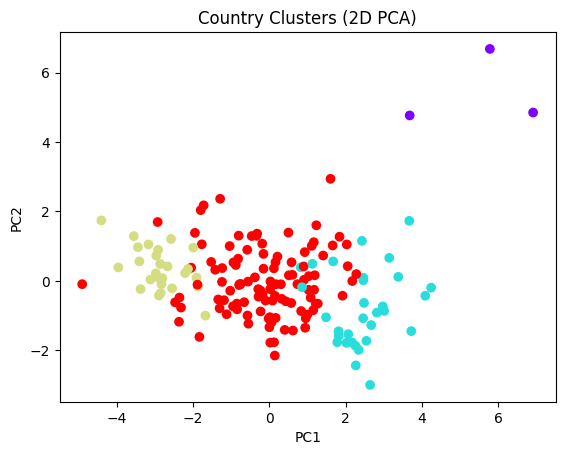

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='rainbow')
plt.title("Country Clusters (2D PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [35]:
for i in df_clusters['Cluster'].unique():
    print(f"Cluster {i}:")
    print(df_clusters[df_clusters['Cluster'] == i]['country'].values)
    print("\n")

Cluster 3:
['Afghanistan' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Gambia' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Kenya'
 'Madagascar' 'Malawi' 'Mali' 'Mozambique' 'Niger' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Tanzania' 'Togo' 'Uganda' 'Zambia']


Cluster 4:
['Albania' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Congo, Rep.' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Fiji' 'Gabon' 'Georgia' 'Ghana' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Jamaica' 'Jordan' 'Kazakhstan' 'Kiribati' 'Kyrgyz Republic' 'Lao'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Lithuania' 'Maced

In [34]:
df_clusters

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,4
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,4
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,4
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,4
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,4
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,4


Form the above results we can say that the countries in cluster 1 and 2 are developed countries in cluster 4 the developing countires and in cluster 3 underdeveloped countries are there.